In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r".\vijay_cleaned.csv",index_col=False).iloc[:,1:]

df

,marketingStatusSimplifiedCd,hasImage,statusText,beds,baths,area,sgapt,has3DModel,hasAdditionalAttributions,latitude,longitude,city,state,homeType,rentZestimate,price
0,Non Owner Occupied,True,Sold,3.0,2.0,1224.0,Unknown Listed By,False,True,42.293304,-71.133570,Roslindale,MA,SINGLE_FAMILY,3999.0,819500.0
1,RecentChange,True,Sold,1.0,1.0,723.0,Unknown Listed By,False,True,42.344826,-71.074990,Boston,MA,CONDO,3634.0,880000.0
2,RecentChange,True,Sold,6.0,3.0,3396.0,Unknown Listed By,False,True,42.315850,-71.061130,Dorchester,MA,MULTI_FAMILY,6000.0,1250000.0
3,RecentChange,True,Sold,4.0,3.0,2400.0,Unknown Listed By,False,True,42.298183,-71.078870,Dorchester,MA,MULTI_FAMILY,4964.0,805000.0
4,RecentChange,True,Sold,9.0,3.0,4107.0,RecentChange,False,True,42.300050,-71.083694,Dorchester,MA,MULTI_FAMILY,8970.0,650000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6201,RecentChange,True,Sold,5.0,4.0,2366.0,Unknown Listed By,False,True,38.963560,-77.016990,Washington,DC,SINGLE_FAMILY,4999.0,1125000.0
6202,RecentChange,True,Sold,3.0,3.0,1802.0,Unknown Listed By,False,True,38.952750,-77.009360,Washington,DC,TOWNHOUSE,3449.0,465000.0
6203,RecentChange,True,Sold,4.0,4.0,2875.0,RecentChange,False,True,38.928920,-76.992680,Washington,DC,SINGLE_FAMILY,4749.0,1020000.0
6204,Non Owner Occupied,False,Sold,4.0,2.5,1260.0,Unknown Listed By,False,False,38.894318,-76.981830,Washington,DC,SINGLE_FAMILY,3994.0,550000.0


In [3]:
df.dtypes.value_counts()

float64    7
object     6
bool       3
Name: count, dtype: int64

In [4]:
boolCols=df.dtypes[df.dtypes=="bool"].index
for col in boolCols:
    df[col]=df[col].apply(lambda x: "true" if x==True else "false" )

df[boolCols]

,hasImage,has3DModel,hasAdditionalAttributions
0,true,false,true
1,true,false,true
2,true,false,true
3,true,false,true
4,true,false,true
...,...,...,...
6201,true,false,true
6202,true,false,true
6203,true,false,true
6204,false,false,false


In [5]:
catCols=df.drop(columns=["price"]).dtypes[(df.dtypes=="object") | (df.dtypes=="bool")].index
numCols=df.drop(columns=["price"]).dtypes[df.dtypes=="float64"].index

print("Categorical columns:")
print(list(catCols))
print("Numerical columns:")
print(list(numCols))

Categorical columns:
['marketingStatusSimplifiedCd', 'hasImage', 'statusText', 'sgapt', 'has3DModel', 'hasAdditionalAttributions', 'city', 'state', 'homeType']
Numerical columns:
['beds', 'baths', 'area', 'latitude', 'longitude', 'rentZestimate']


<Axes: xlabel='price'>

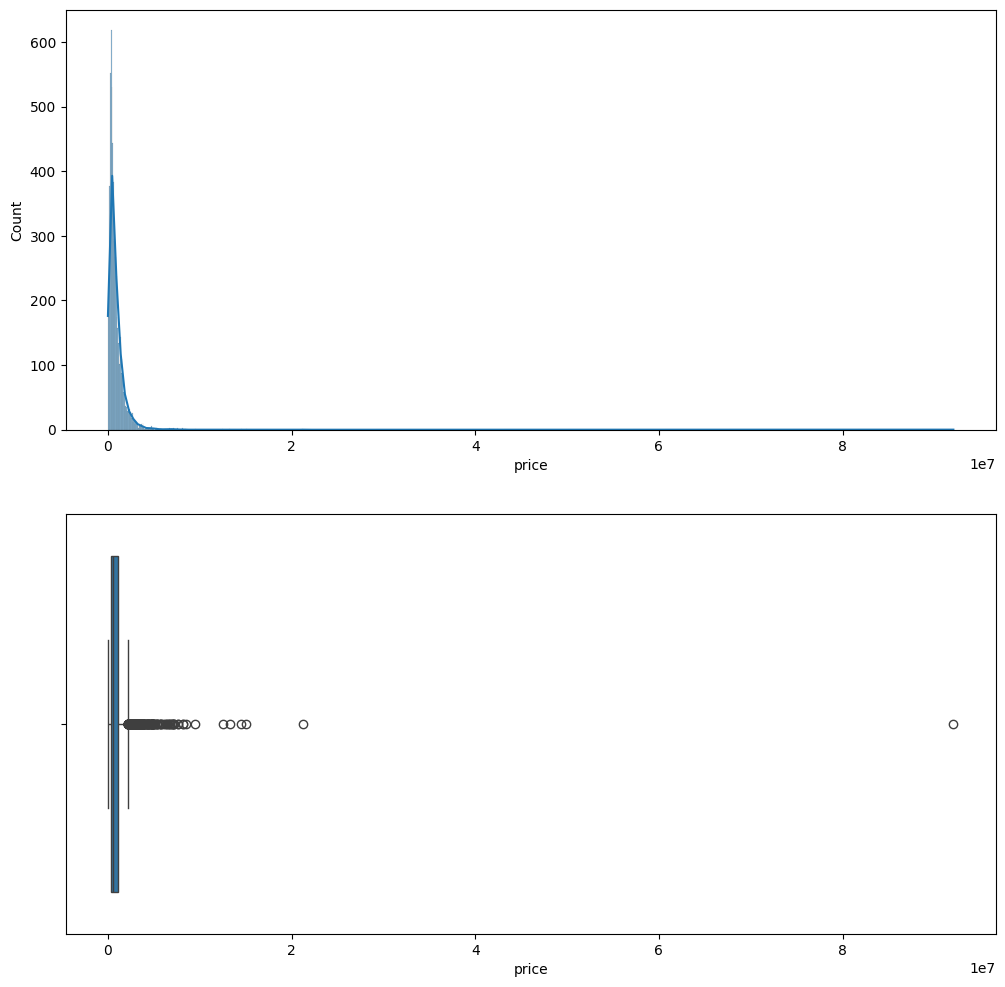

In [6]:
fig,ax=plt.subplots(2,1,figsize=(12,12))
sns.histplot(data=df,x="price",kde=True,ax=ax[0])
sns.boxplot(data=df,x="price",ax=ax[1])

In [7]:
priceWithoutMax10Indices=df["price"].sort_values(ascending=False).head(10).index
df.drop(priceWithoutMax10Indices,inplace=True)

<Axes: xlabel='price'>

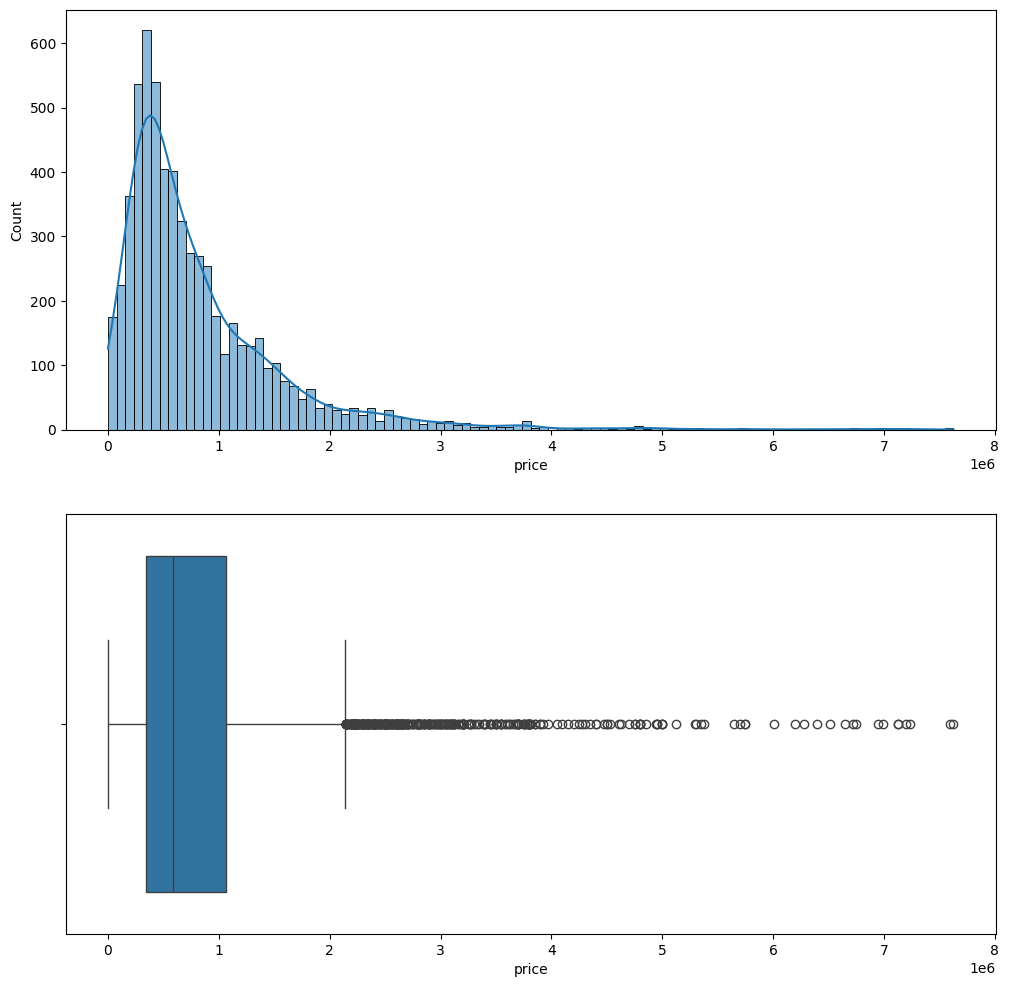

In [8]:
fig,ax=plt.subplots(2,1,figsize=(12,12))
sns.histplot(data=df,x="price",kde=True,ax=ax[0])
sns.boxplot(data=df,x="price",ax=ax[1])

# Univariate Analysis

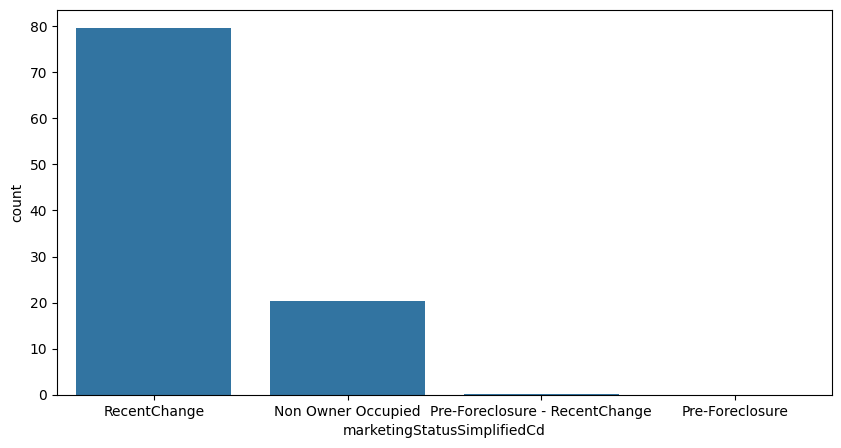

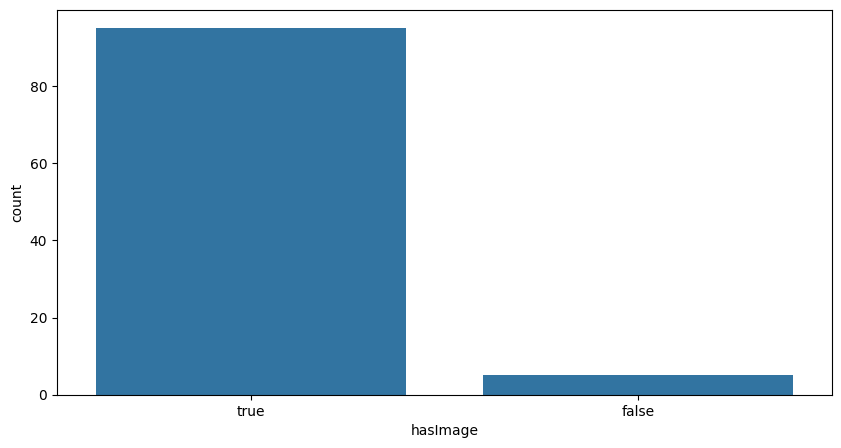

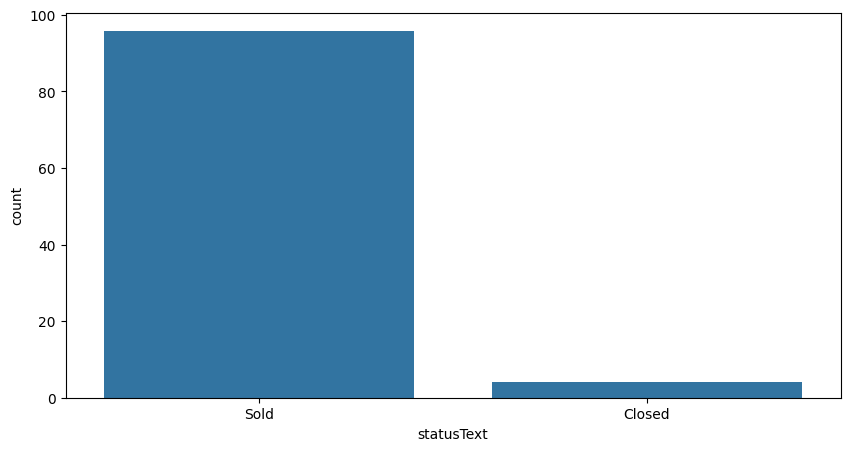

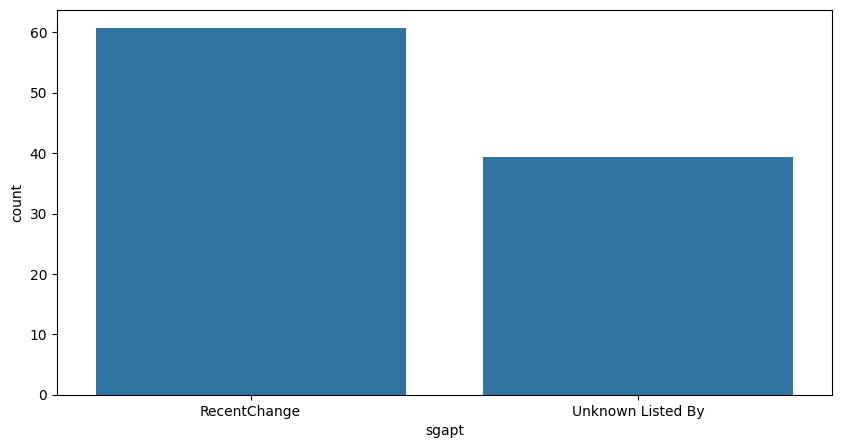

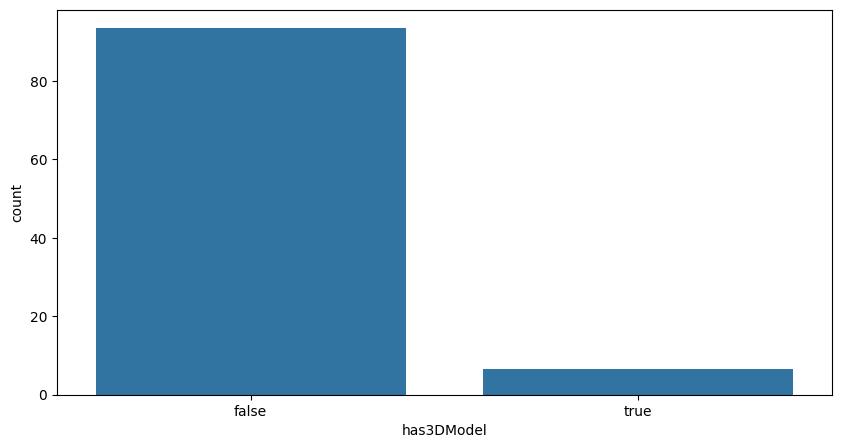

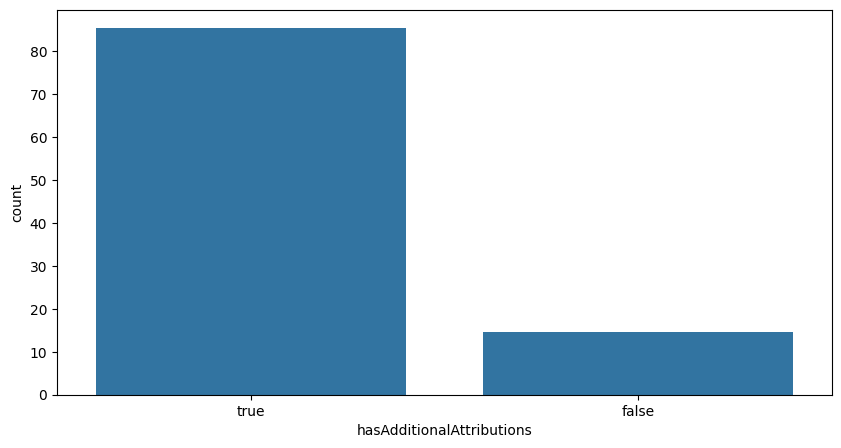

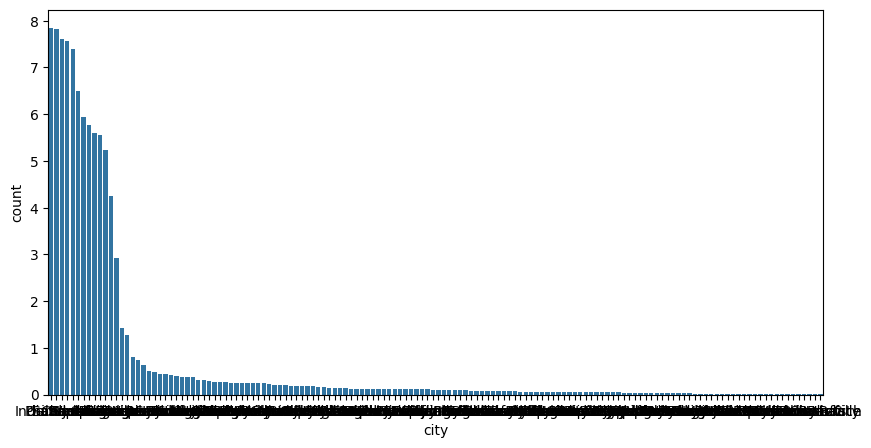

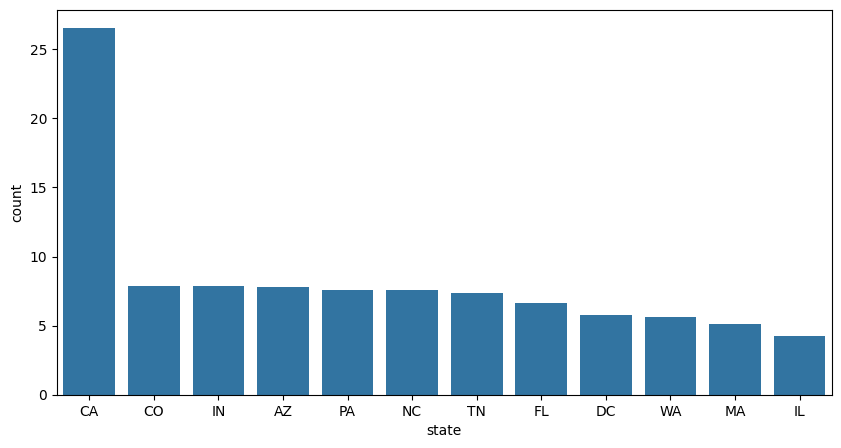

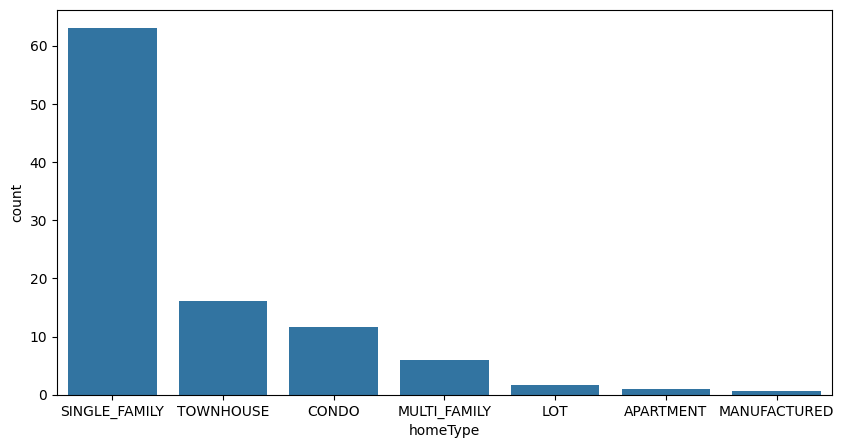

In [9]:
for col in catCols:
    fig,ax=plt.subplots(1,1,figsize=(10,5))
    sns.barplot((df[col].value_counts()/df.shape[0])*100,ax=ax)


In [10]:
df['city'].nunique()

142

In [11]:
(df["city"].value_counts()/df["city"].shape[0])*100

city
Denver             7.843770
Indianapolis       7.827631
San Jose           7.601679
Philadelphia       7.569400
Charlotte          7.391866
                     ...   
Belleair Bluffs    0.016139
Belleair           0.016139
Madeira Beach      0.016139
Kenneth City       0.016139
Huntersville       0.016139
Name: count, Length: 142, dtype: float64

In [12]:
(((df["city"].value_counts()/df["city"].shape[0])*100)>1).sum()

15

In [13]:
les_propor_cities=df["city"].value_counts()[(((df["city"].value_counts()/df["city"].shape[0])*100)<1)].index
df["city"]=df["city"].apply(lambda x:x if x not in les_propor_cities else "Others")
df["city"].value_counts()

city
Others           1072
Denver            486
Indianapolis      485
San Jose          471
Philadelphia      469
Charlotte         458
Phoenix           402
San Diego         368
Washington        358
Seattle           347
San Francisco     344
Nashville         324
Chicago           264
Los Angeles       181
Tampa              88
Boston             79
Name: count, dtype: int64

Text(0.5, 0, 'Proportion')

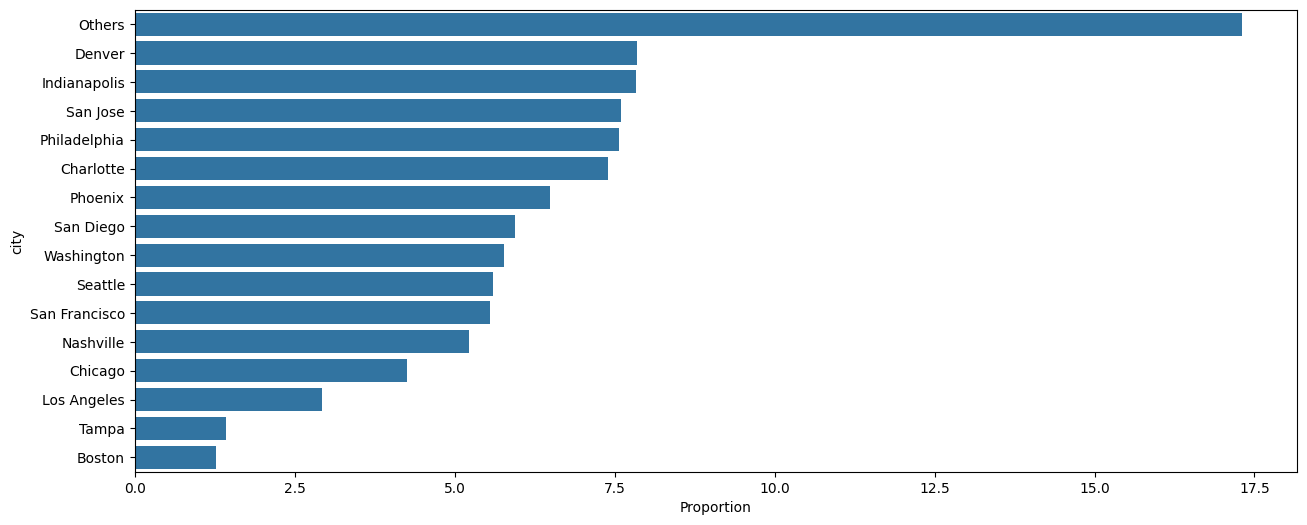

In [14]:
fig=plt.figure(figsize=(15,6))
sns.barplot((df["city"].value_counts()/df.shape[0])*100,orient="h")
plt.xlabel("Proportion")

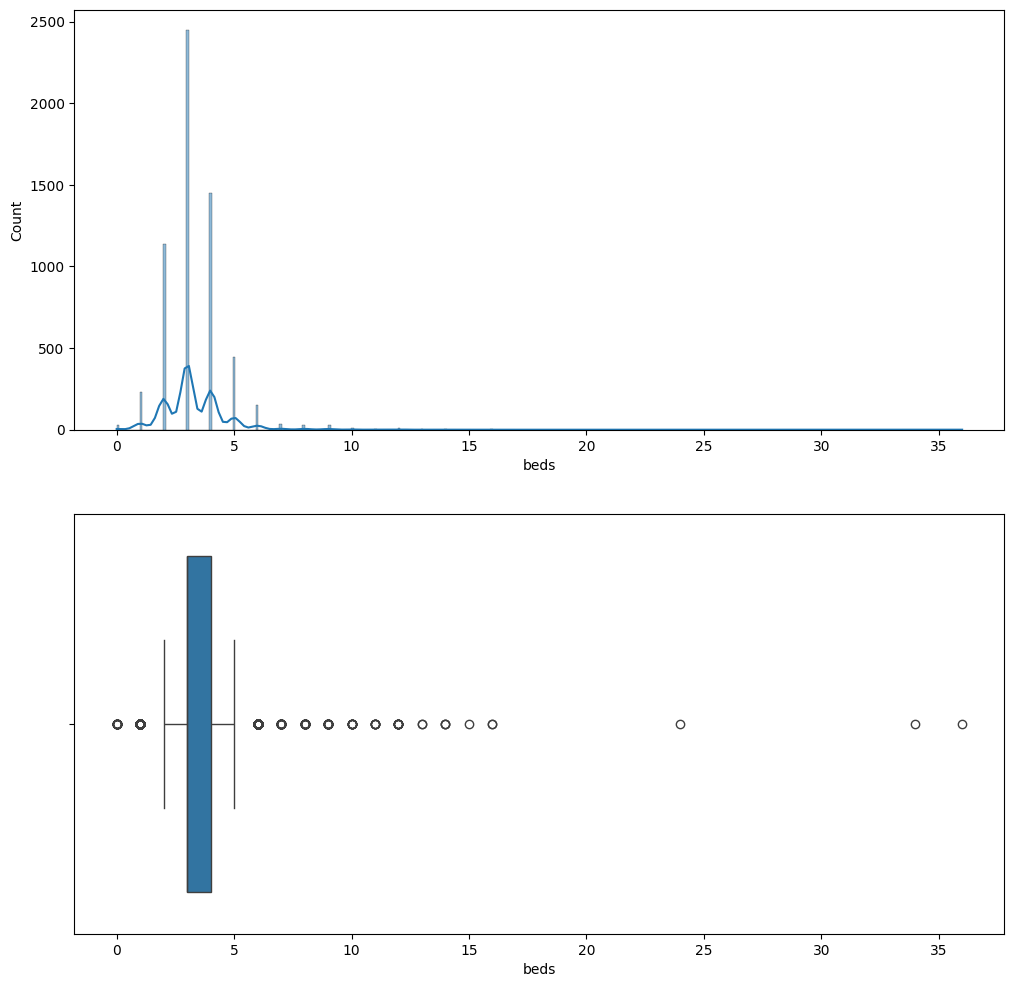

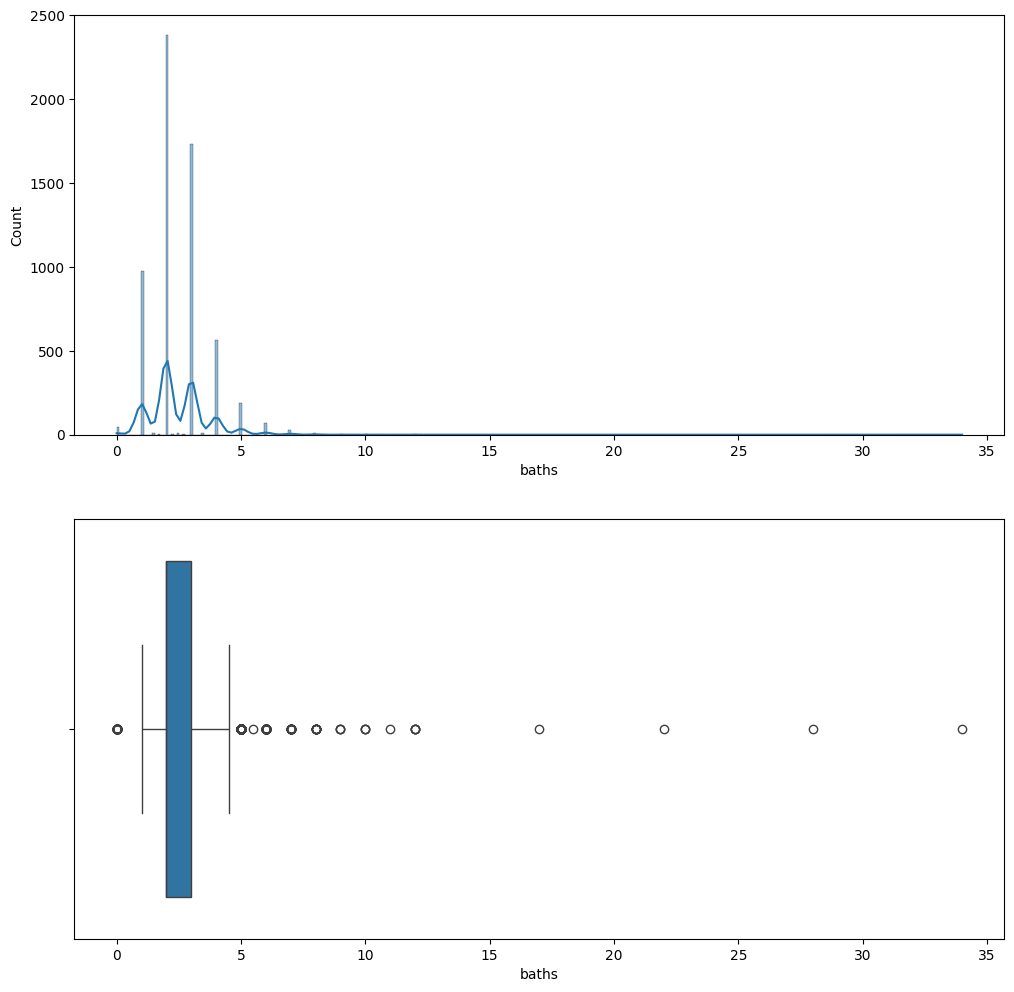

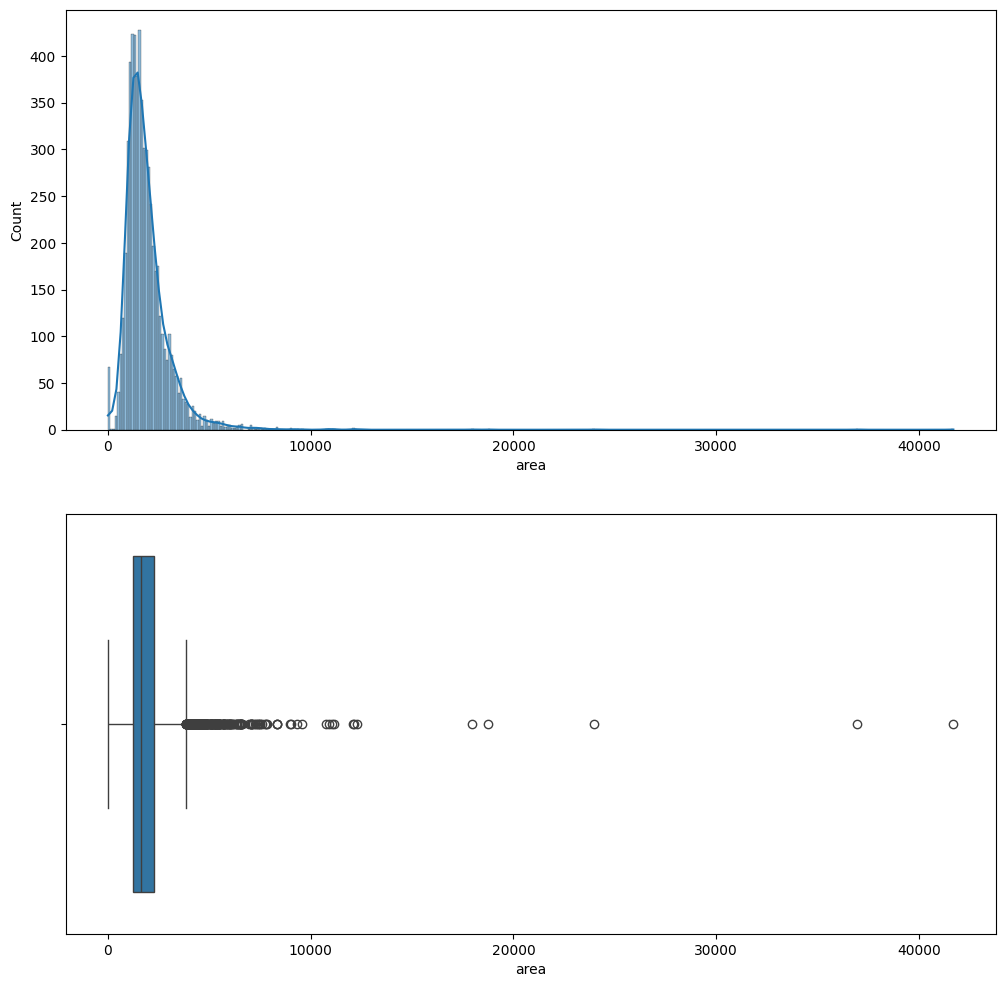

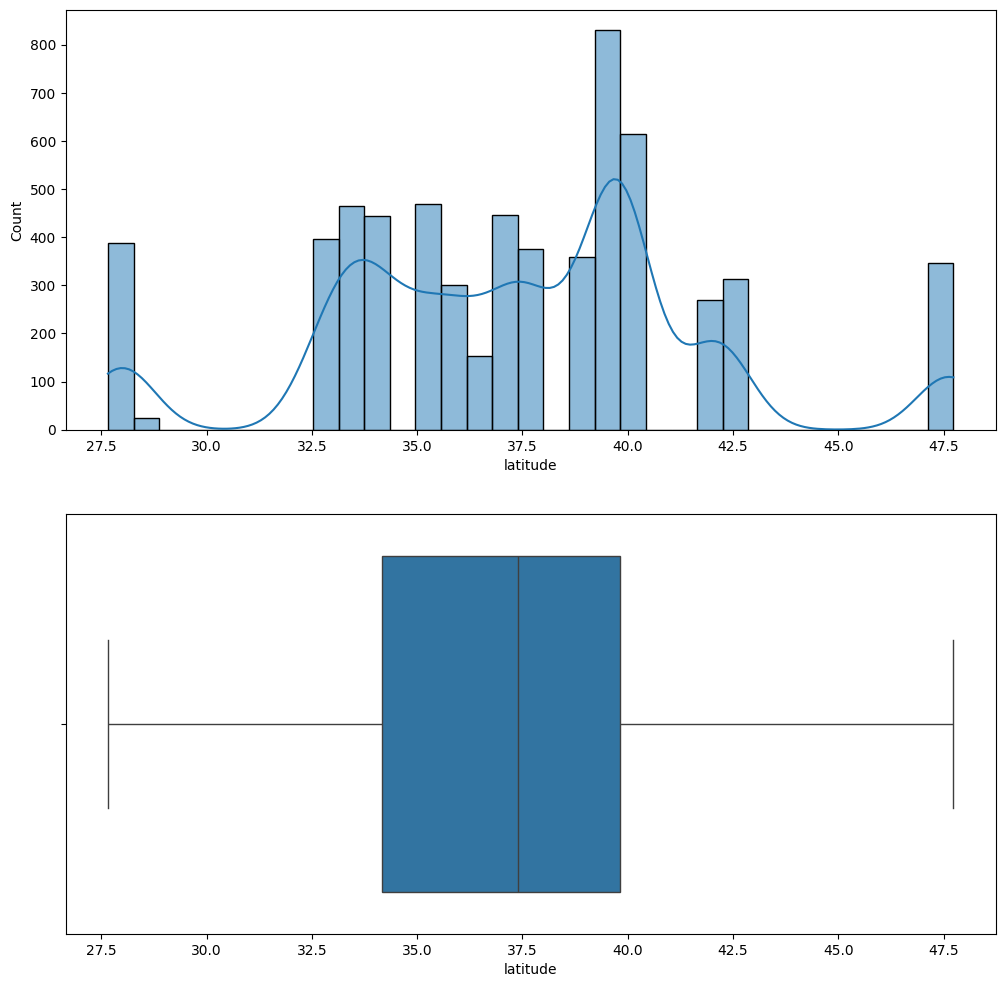

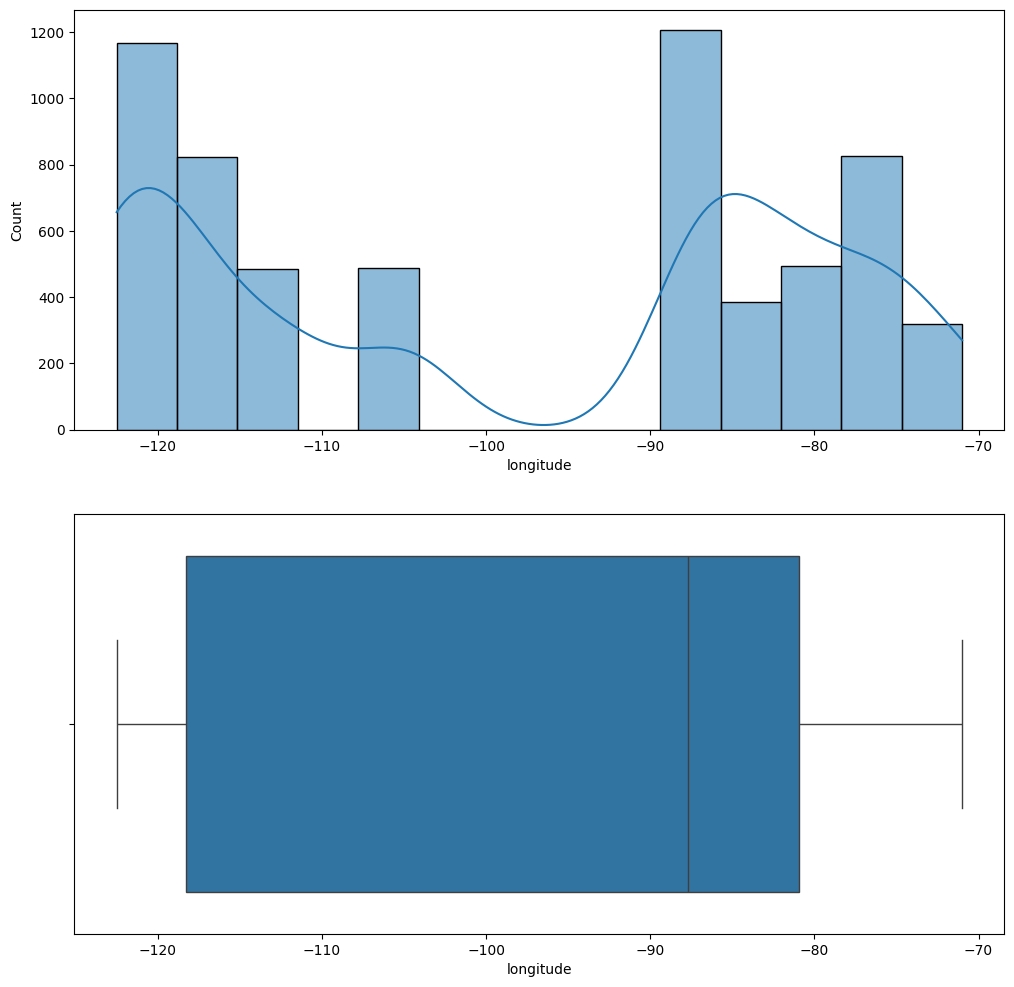

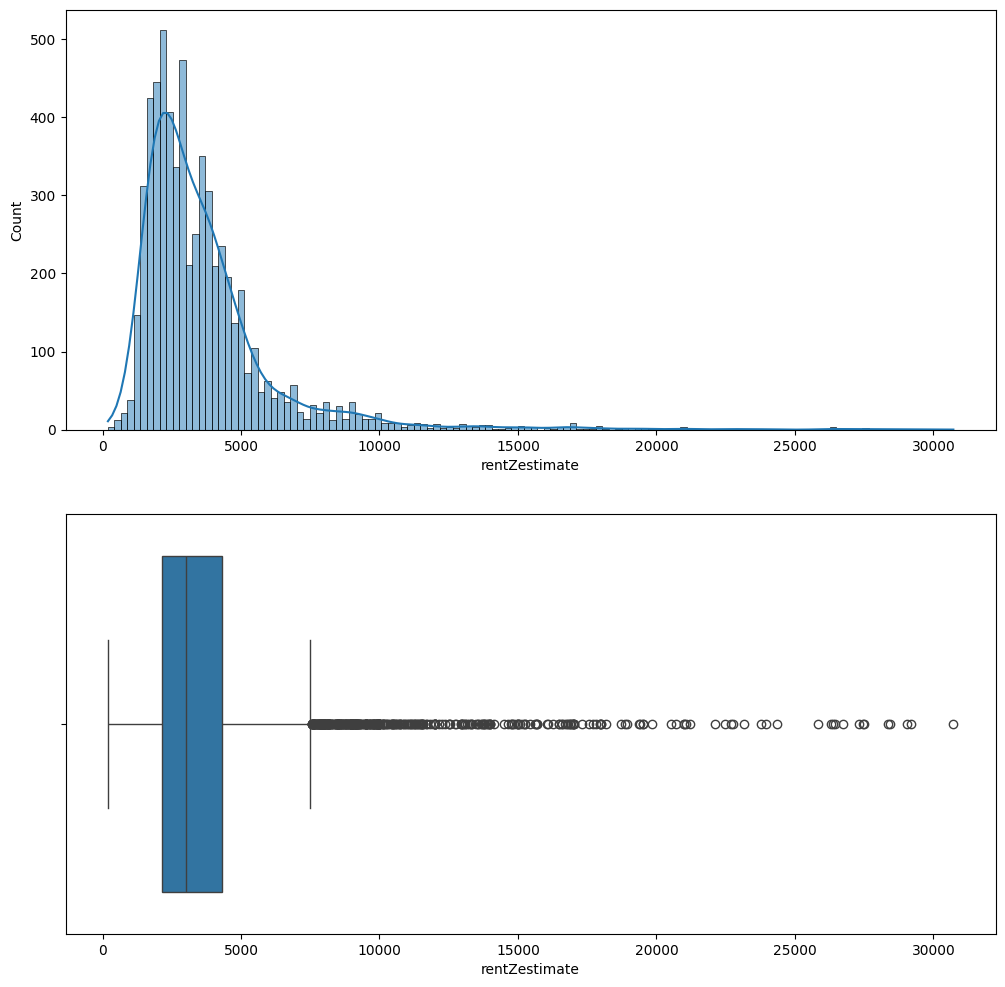

In [15]:
for col in numCols:
    fig,ax=plt.subplots(2,1,figsize=(12,12))
    sns.histplot(data=df,x=col,kde=True,ax=ax[0])
    sns.boxplot(data=df,x=col,ax=ax[1])

# Bivariate Analysis

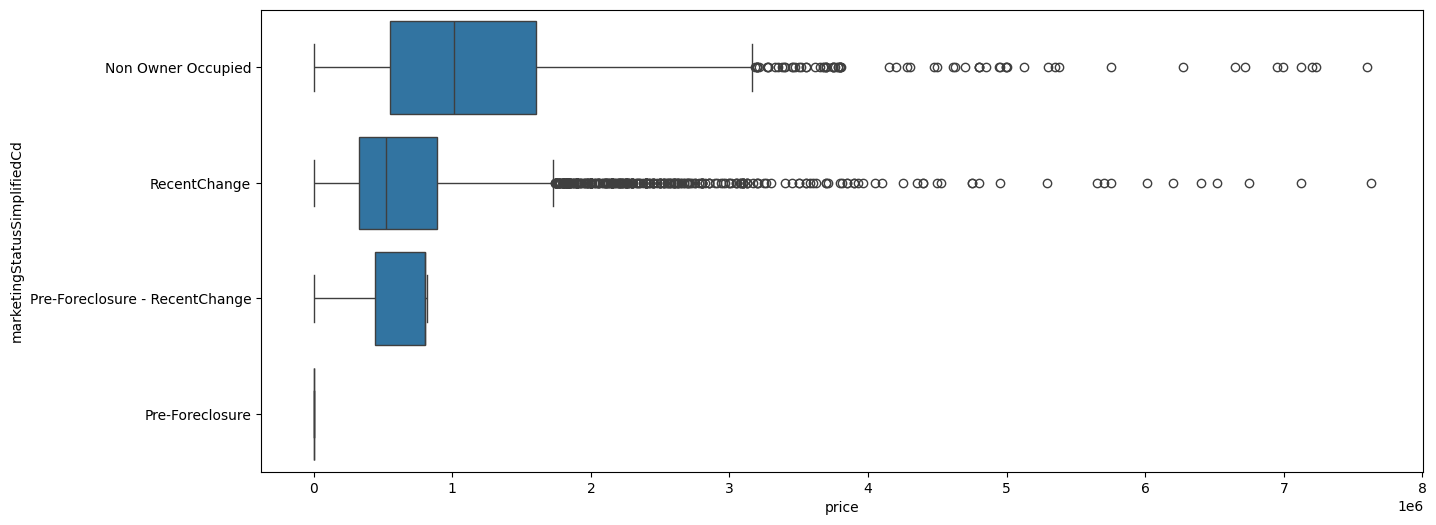

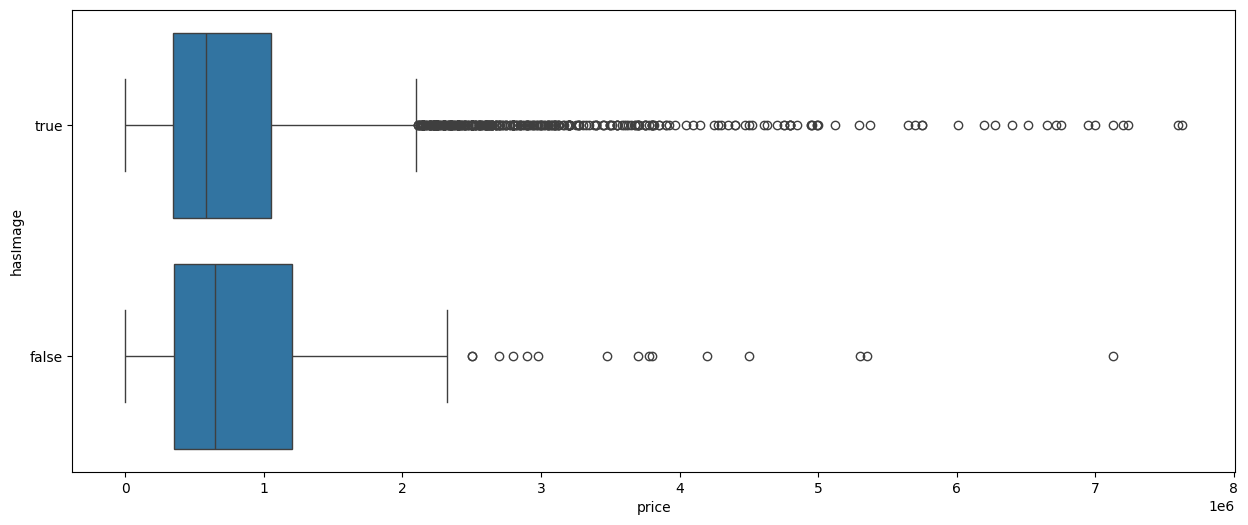

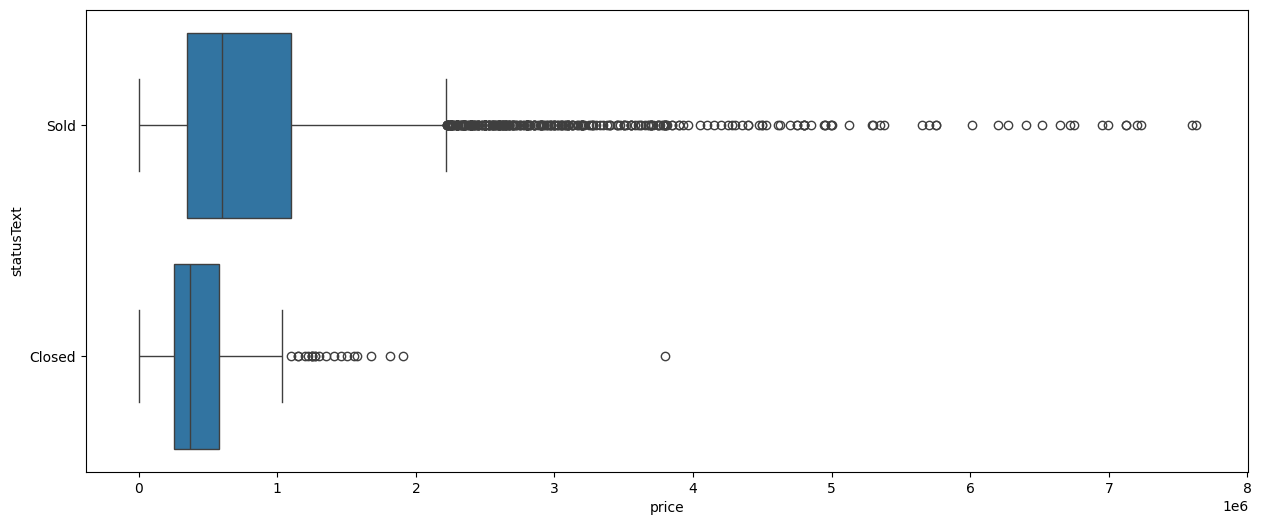

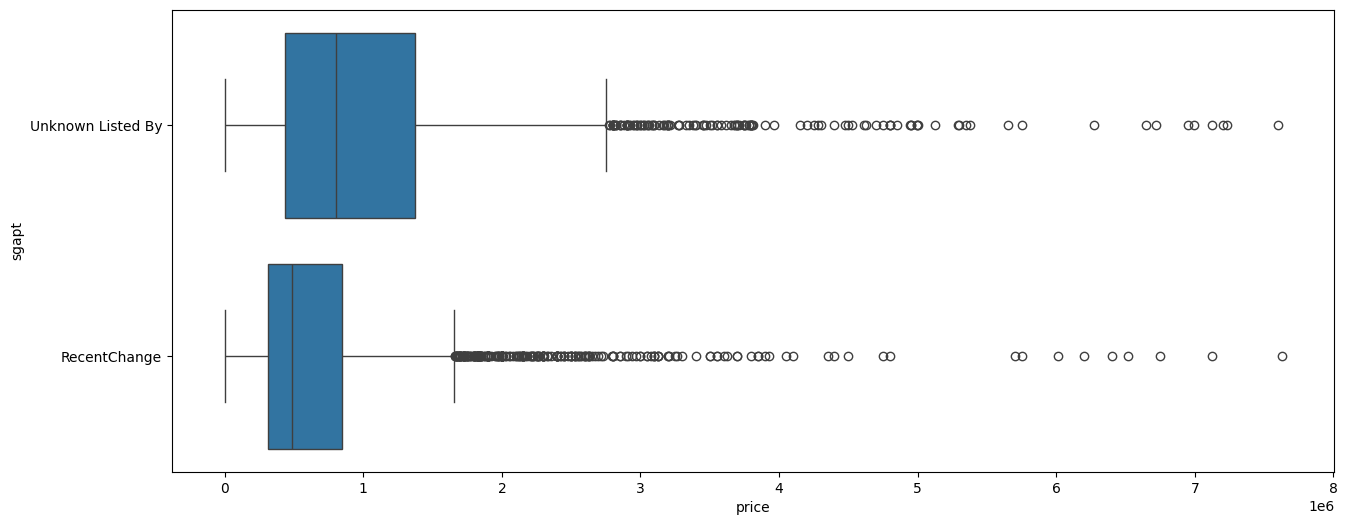

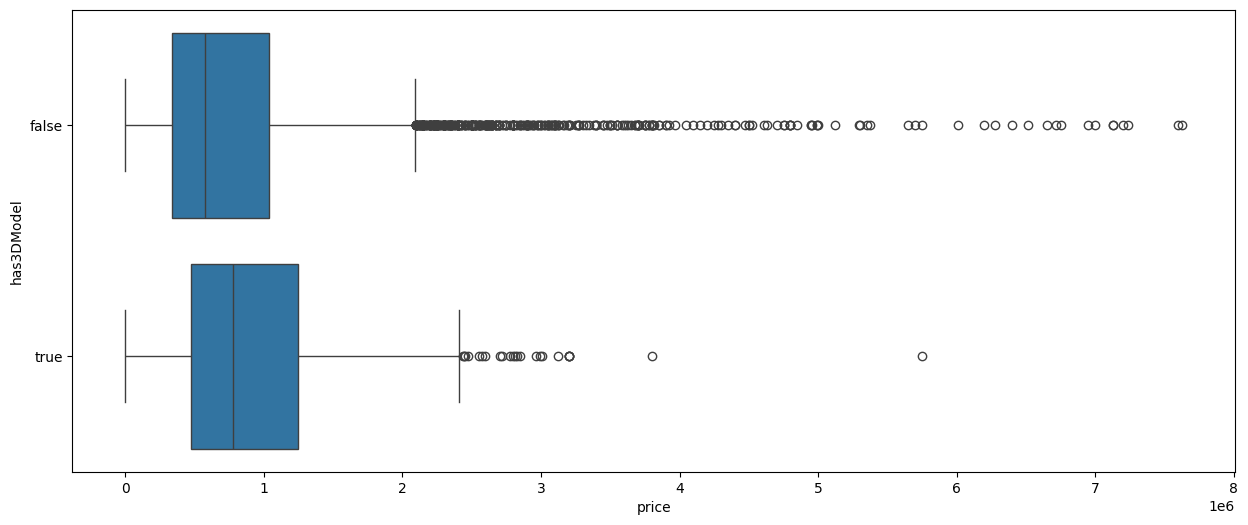

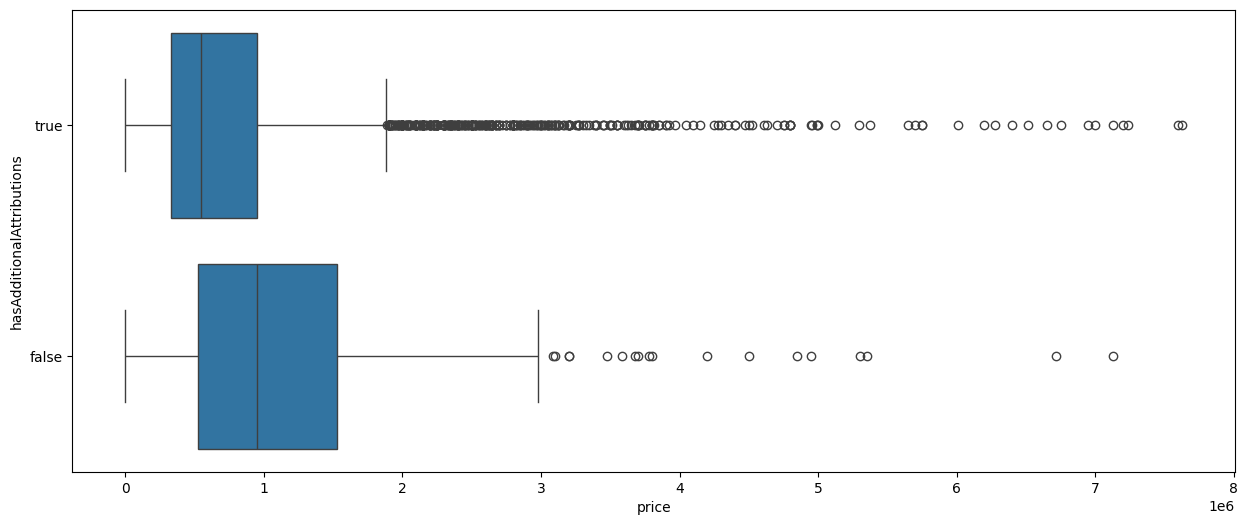

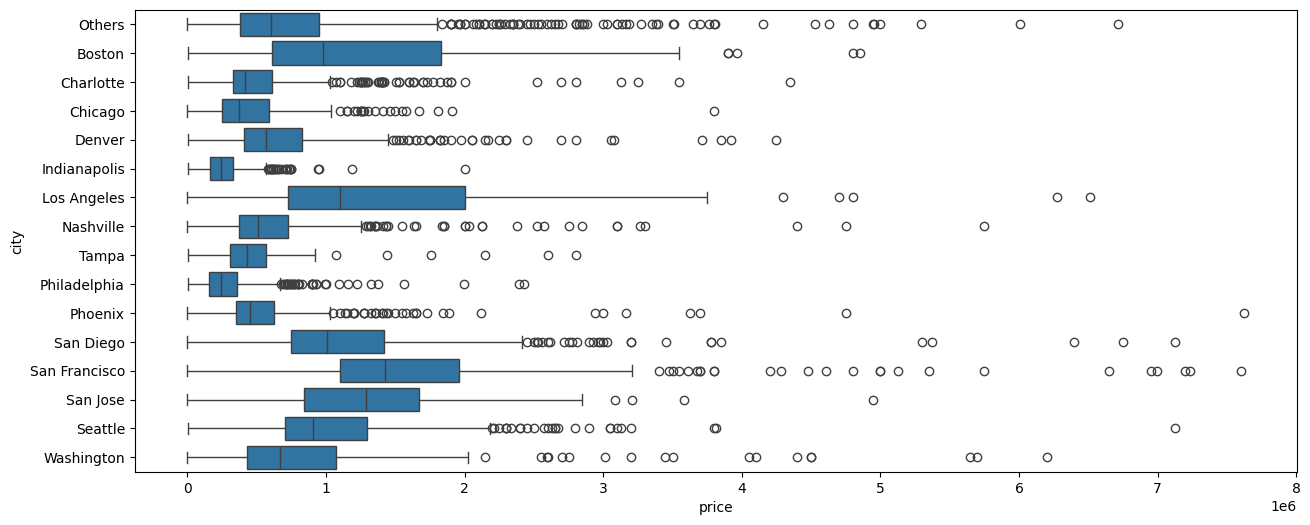

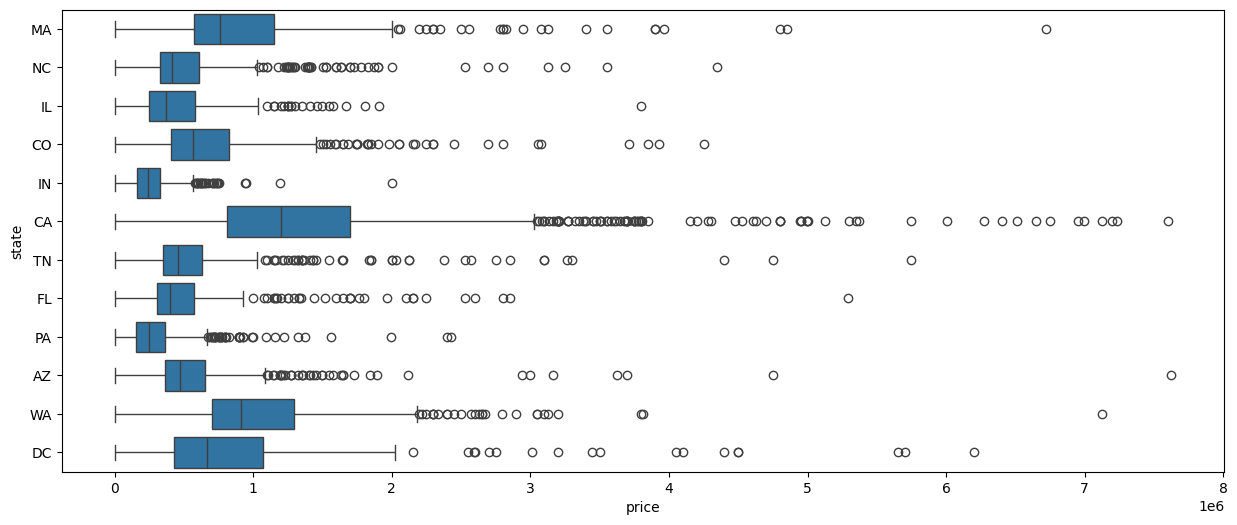

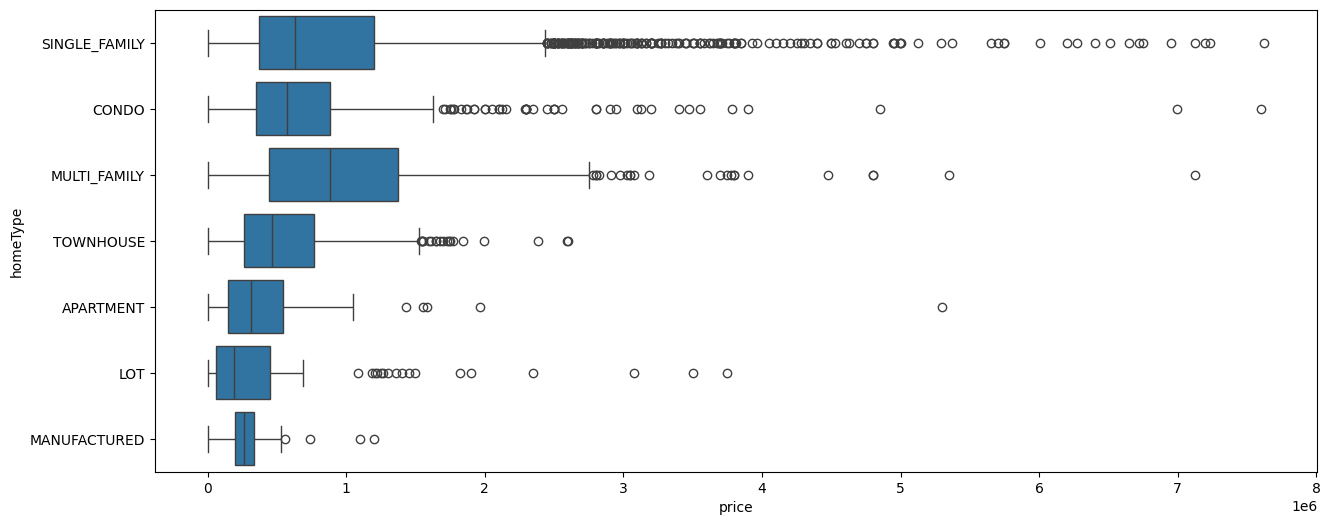

In [16]:

for col in catCols:
    fig,ax=plt.subplots(1,1,figsize=(15,6))
    sns.boxplot(data=df,y=col,x='price',ax=ax)

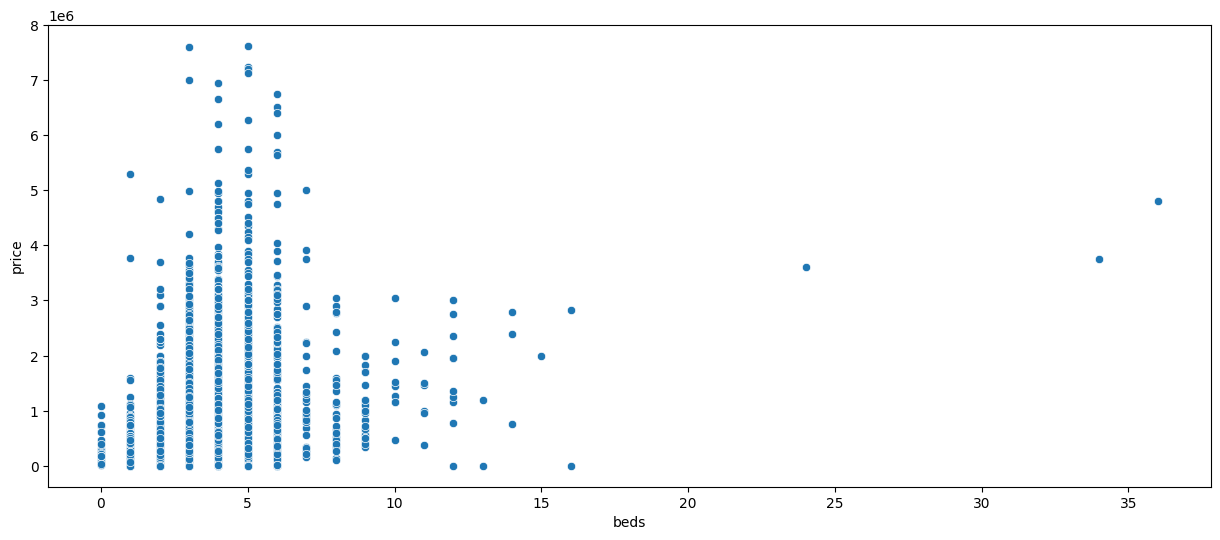

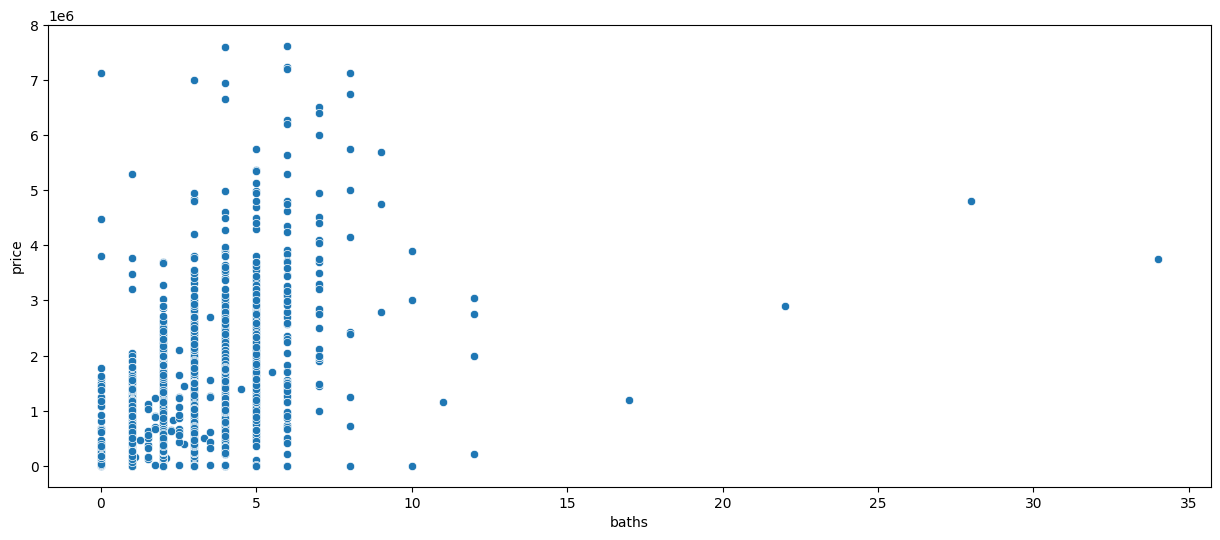

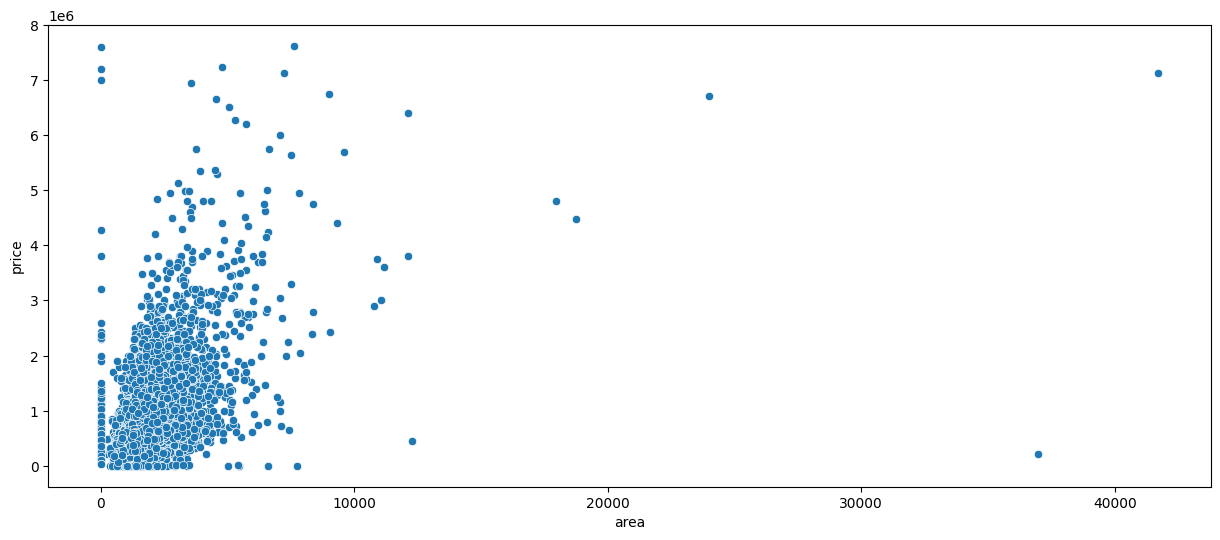

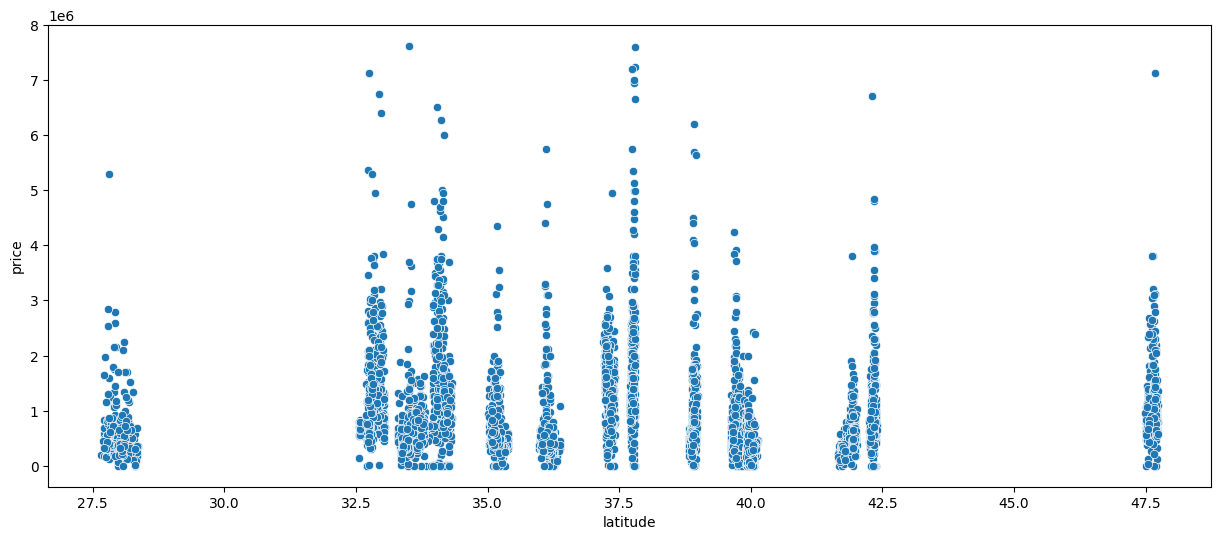

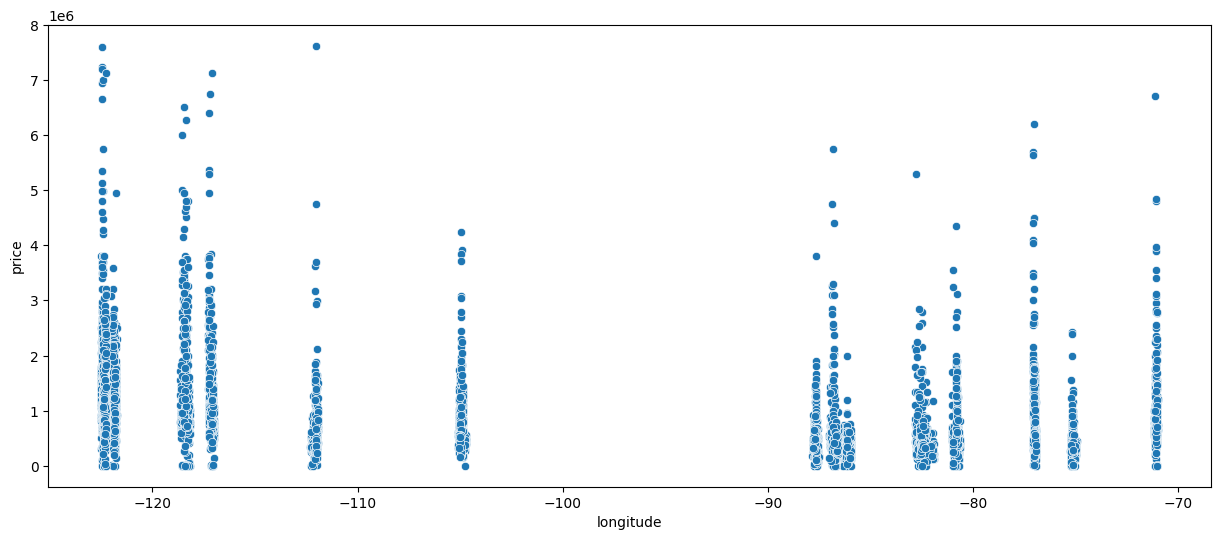

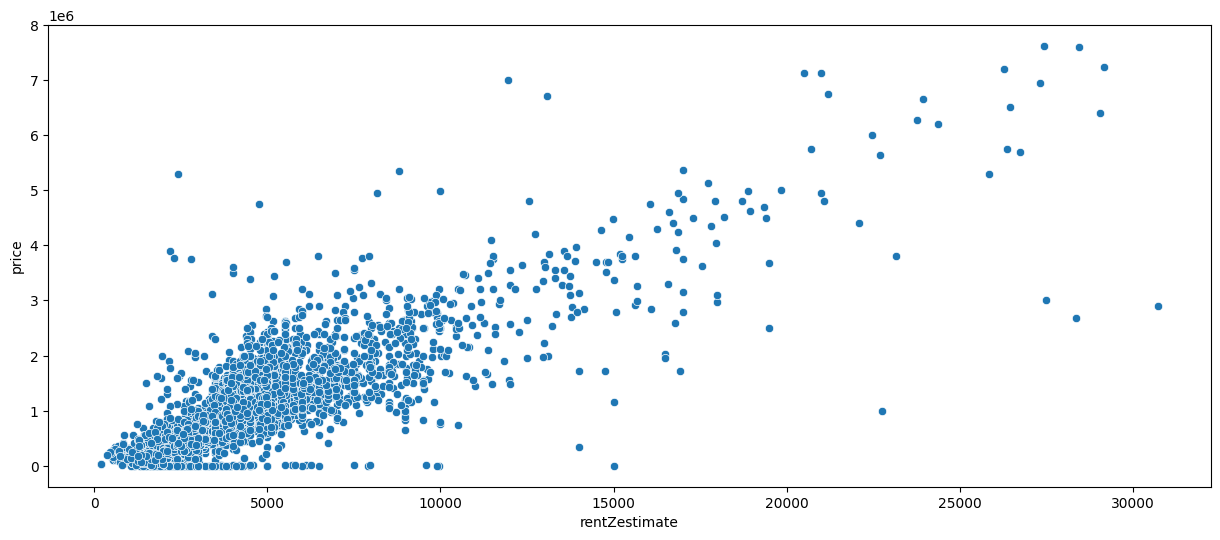

In [20]:

for col in numCols:
    fig,ax=plt.subplots(1,1,figsize=(15,6))
    sns.scatterplot(data=df,x=col,y='price',ax=ax)

In [32]:
df["marketingStatusSimplifiedCd"].value_counts()

marketingStatusSimplifiedCd
RecentChange                      4931
Non Owner Occupied                1259
Pre-Foreclosure - RecentChange       5
Pre-Foreclosure                      1
Name: count, dtype: int64

In [21]:
df["area"].value_counts()

area
0.0       65
1200.0    41
1000.0    32
1350.0    23
960.0     22
          ..
1177.0     1
2846.0     1
2845.0     1
3794.0     1
2875.0     1
Name: count, Length: 2433, dtype: int64

<Axes: xlabel='beds', ylabel='price'>

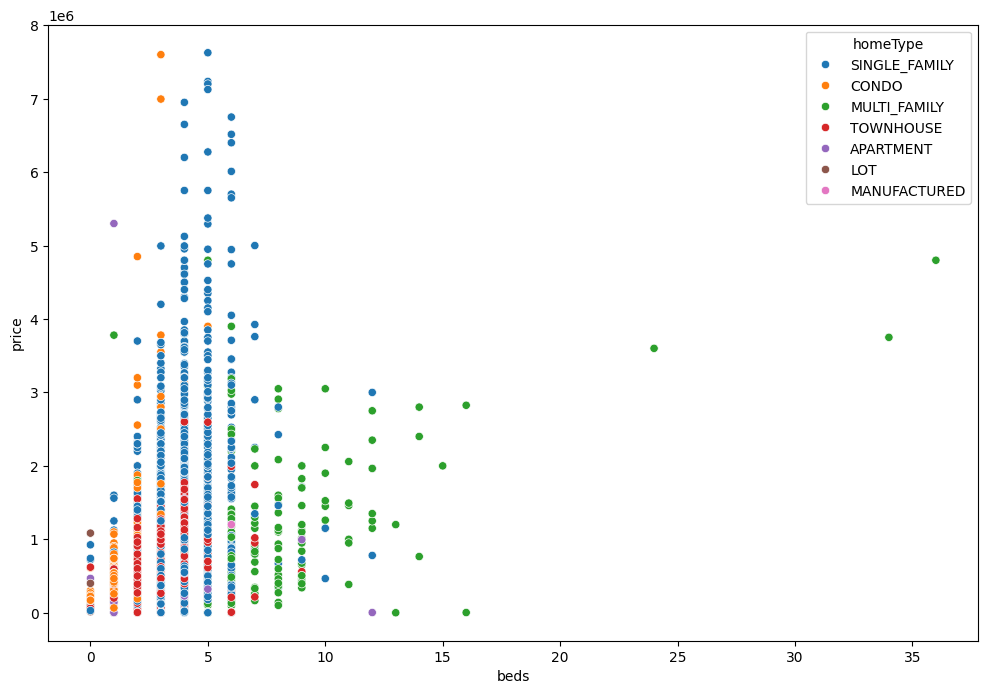

In [26]:
fig=plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x="beds",y="price",hue="homeType")

<Axes: xlabel='baths', ylabel='price'>

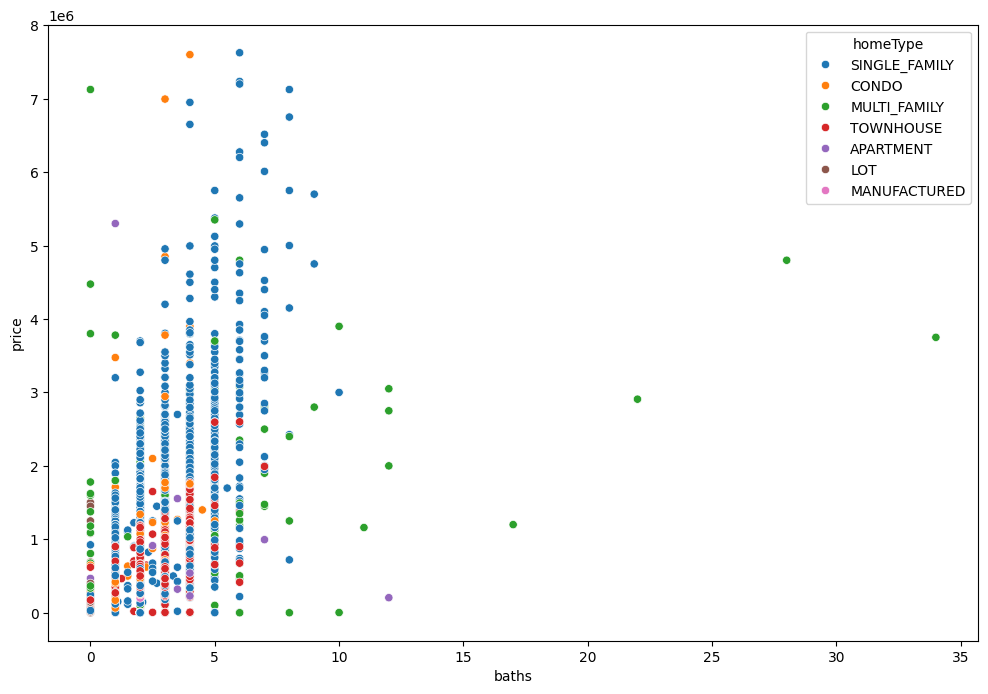

In [29]:
fig=plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x="baths",y="price",hue="homeType")

<Axes: xlabel='area', ylabel='price'>

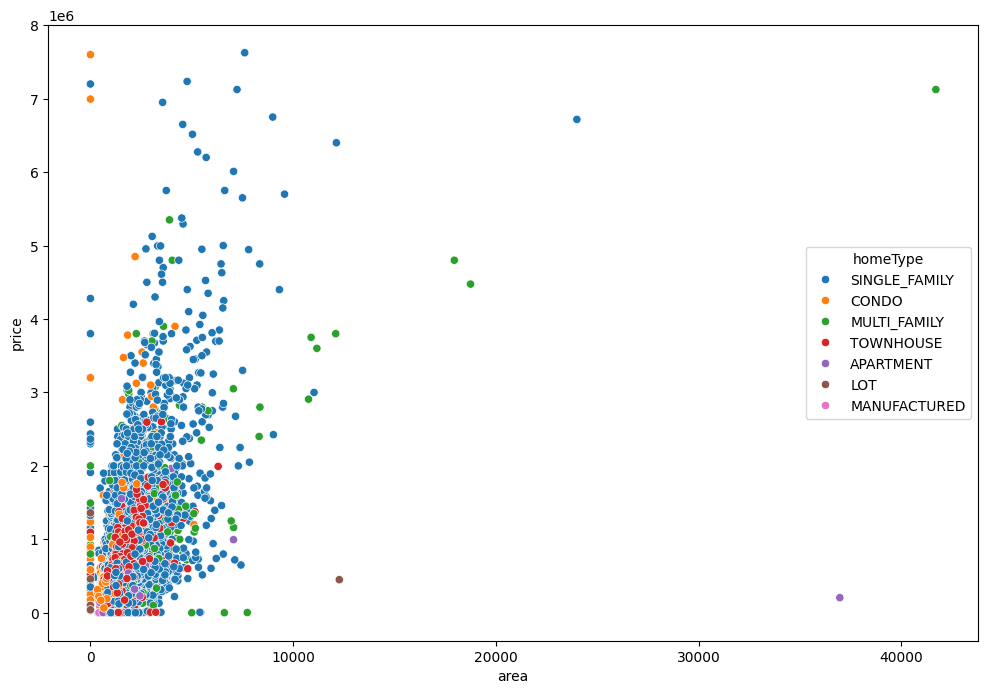

In [30]:
fig=plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x="area",y="price",hue="homeType")

<Axes: xlabel='hasAdditionalAttributions', ylabel='price'>

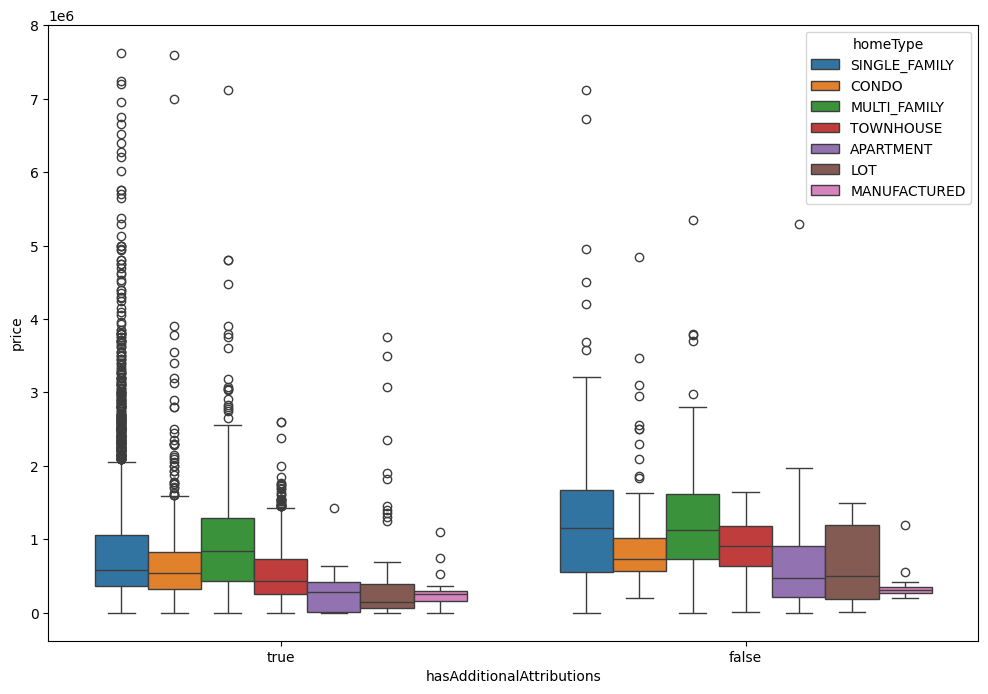

In [31]:
fig=plt.figure(figsize=(12,8))
sns.boxplot(data=df,x="hasAdditionalAttributions",y="price",hue="homeType")